In [1]:
!pip3 install timm



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import cv2
import os
import torch
import urllib.request
import matplotlib.pyplot as plt
import numpy as np

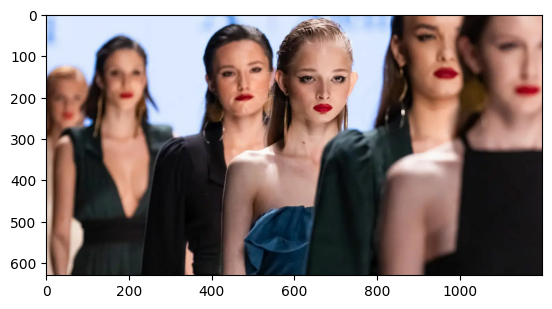

In [3]:
img_path = 'content/moscow-fashion-week.png'
img = plt.imread(img_path)
plt.imshow(img)
plt.show()

In [4]:
model_type = "DPT_Large"

In [5]:
midas = torch.hub.load("intel-isl/MiDaS", model_type)

Using cache found in /Users/pranamshetty/.cache/torch/hub/intel-isl_MiDaS_master


In [6]:
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")

In [7]:
print(device)

mps


In [8]:
# rm ~/.cache/torch/hub/checkpoints/dpt_large_384.pt
midas.to(device)
midas.eval()

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_featur

In [9]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
if model_type == "DPT_Large":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /Users/pranamshetty/.cache/torch/hub/intel-isl_MiDaS_master


In [10]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_batch = transform(img).to(device)


In [11]:
with torch.no_grad():
    prediction = midas(input_batch)
    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
    size = img.shape[:2],
    mode = "bilinear",
    align_corners = False,
    ).squeeze()
output = prediction.cpu().numpy()

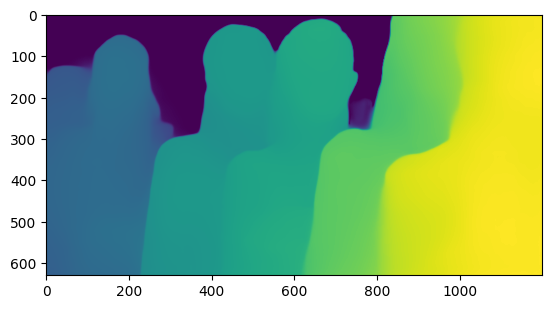

In [12]:
plt.imshow(output)

In [13]:
#as i am using apple silicon, the bicubic mode is not supported on gpu so shifting the load to cpu here and using a different img
import os
from matplotlib import cm
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
device = "cpu" #bicubic doesnt work for Apple Silicon

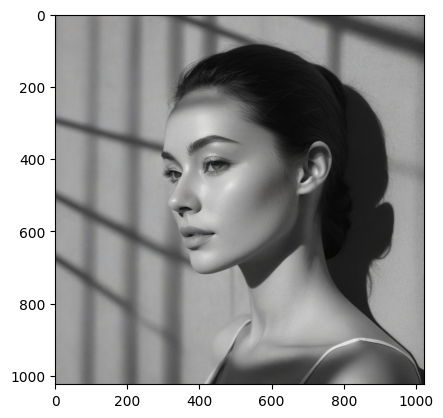

In [14]:
#IMG 2
img_path_2 = "content/model_insta.jpeg"
img2 = plt.imread(img_path_2)
plt.imshow(img2)

In [19]:
img2 = cv2.imread(img_path_2)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
input_batch2 = transform(img2).to(device)
# rm ~/.cache/torch/hub/checkpoints/dpt_large_384.pt
midas.to(device)
midas.eval()

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_featur

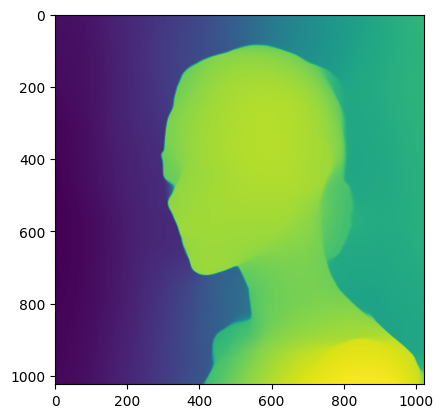

In [20]:
with torch.no_grad():
    prediction = midas(input_batch2)
    prediction = torch.nn.functional.interpolate(
    prediction.unsqueeze(1),
    size = img2.shape[:2],
    mode = "bicubic",
    align_corners = False,
    ).squeeze()
output2 = prediction.cpu().numpy()
plt.imshow(output2)


In [21]:
depth_map_normalized = cv2.normalize(output2, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
depth_map_blurryeff = cv2.GaussianBlur(depth_map_normalized, (21, 21), 0)

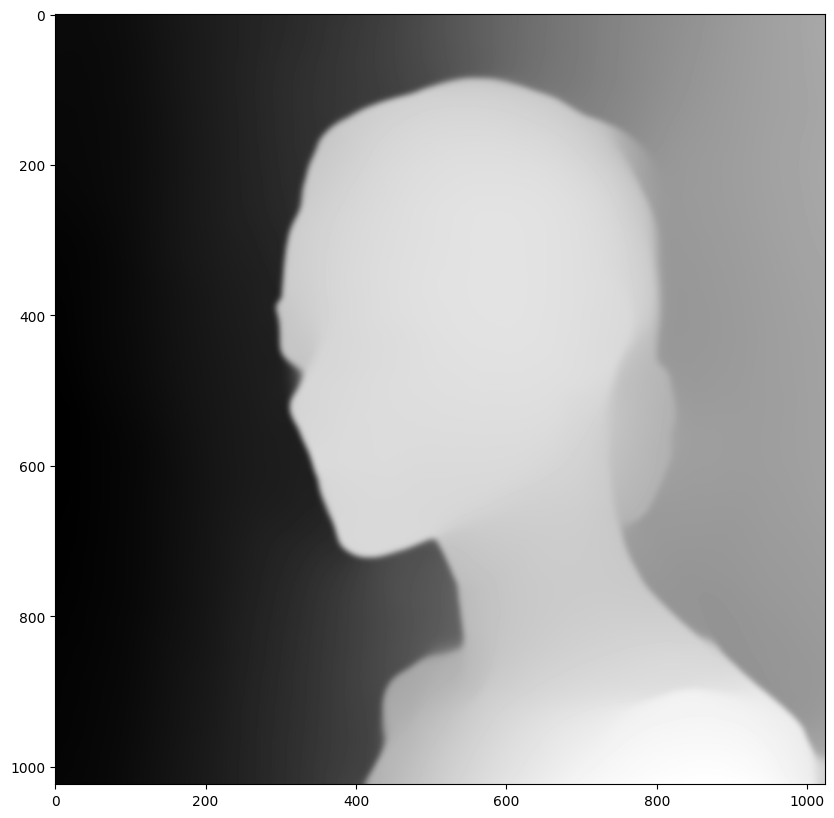

In [22]:
plt.figure(figsize = (10,10))
plt.imshow(depth_map_blurryeff, cmap = 'gray')
plt.show()